In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


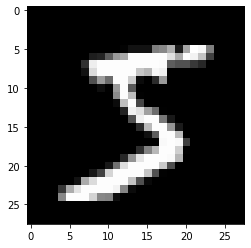

In [3]:
# initial
train_images_file = open('./data/train-images-idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('data/train-labels-idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    train_set.append((image, label))

# Reading The Test Set
test_images_file = open('data/t10k-images-idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('data/t10k-labels-idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    test_set.append((image, label))

# Plotting an image
show_image(train_set[0][0])
plt.show()

input image number 2 


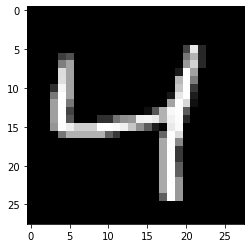

lable number 2
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [4]:
# check some images
print('input image number 2 ')
show_image(train_set[2][0])
plt.show()
print('lable number 2')
print(train_set[2][1])

In [5]:
print('INITIAL weights\n\n')
np.random.seed(8)
Wl1 = np.random.random((16, 784))
Wl2 = np.random.random((16, 16))
Wl3 = np.random.random((10, 16))

B1 = np.zeros((16, 1))
B2 = np.zeros((16, 1))
B3 = np.zeros((10, 1))

print(B3)
# def forward()

INITIAL weights


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
arr = np.array([[1, 2, 3]])


def sigmoid(arr):
    return 1 / (np.exp(-arr) + 1)


def sigmoid_prime(arr):
    return sigmoid(arr) * (1 - sigmoid(arr))


print(sigmoid(arr))

[[0.73105858 0.88079708 0.95257413]]


In [7]:
print('test')
arr = np.array([[1, 2, 3], [1, 1, 1]])
arr2 = np.array([[1, 2, 3]])
print(arr.T.shape)
print(arr2.shape)
print(arr2.dot(arr.T))


test
(3, 2)
(1, 3)
[[14  6]]


FORWARD 
W1 (16, 784)
W2 (16, 16)
W3 (10, 16)


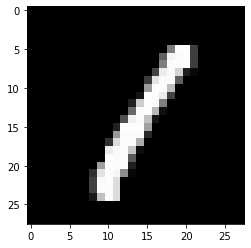

In [8]:
print('FORWARD ')
print('W1', Wl1.shape)
print('W2', Wl2.shape)
print('W3', Wl3.shape)


def forward(input_layer, Wl1, Wl2, Wl3, B1, B2, B3):
    Z1 = Wl1 @ input_layer + B1
    A1 = sigmoid(Z1)
    Z2 = Wl2 @ A1 + B2
    A2 = sigmoid(Z2)
    Z3 = Wl3 @ A2 + B3
    A3 = sigmoid(Z3)
    return A1, A2, A3, Z1, Z2, Z3


show_image(train_set[3][0])
plt.show()
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[3][0], Wl1, Wl2, Wl3, B1, B2, B3)
# print('input ', train_set[3][0])
# print('predict',x)

In [9]:
correct_count = 0
for i in range(1000):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    print('prediction= ', predict)
    print('label= ', label)
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / 1000 * 100, '%')


prediction=  7
label=  5
prediction=  7
label=  0
prediction=  7
label=  4
prediction=  7
label=  1
prediction=  7
label=  9
prediction=  7
label=  2
prediction=  7
label=  1
prediction=  7
label=  3
prediction=  7
label=  1
prediction=  7
label=  4
prediction=  7
label=  3
prediction=  7
label=  5
prediction=  7
label=  3
prediction=  7
label=  6
prediction=  7
label=  1
prediction=  7
label=  7
prediction=  7
label=  2
prediction=  7
label=  8
prediction=  7
label=  6
prediction=  7
label=  9
prediction=  7
label=  4
prediction=  7
label=  0
prediction=  7
label=  9
prediction=  7
label=  1
prediction=  7
label=  1
prediction=  7
label=  2
prediction=  7
label=  4
prediction=  7
label=  3
prediction=  7
label=  2
prediction=  7
label=  7
prediction=  7
label=  3
prediction=  7
label=  8
prediction=  7
label=  6
prediction=  7
label=  9
prediction=  7
label=  0
prediction=  7
label=  5
prediction=  7
label=  6
prediction=  7
label=  0
prediction=  7
label=  7
prediction=  7
label=  6


In [10]:
def backpropagation(A1, A2, A3, Z1, Z2, Z3, W2, W3, input_layer, label):
    grad_A3 = 2 * (A3 - label)

    grad_b3 = 2 * sigmoid_prime(Z3) * (A3 - label)
    grad_Wl3 = (2 * sigmoid_prime(Z3) * (A3 - label)) @ A2.T
    grad_A2 = W3.T @ (2 * sigmoid_prime(Z3) * (A3 - label))

    grad_b2 = grad_A2
    grad_Wl2 = (grad_A2 * sigmoid(Z2)) @ A1.T
    grad_A1 = W2.T @ (sigmoid_prime(Z2) * grad_A2)

    grad_b1 = grad_A1
    grad_Wl1 = (grad_A1 * sigmoid_prime(Z1)) @ input_layer.T

    return grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3





In [11]:
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[3][0], Wl1, Wl2, Wl3, B1, B2, B3)
grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                          Wl2, Wl3, train_set[3][0], train_set[3][1])

print(grad_b1[2])

[4.61216677e-05]


In [12]:
x = np.array([1, 2, 3])

In [25]:
def model(input_data, batch, epoc, learning_rate):
    m = len(input_data)
    np.random.seed(2)
    Wl1 = np.random.random((16, 784))
    Wl2 = np.random.random((16, 16))
    Wl3 = np.random.random((10, 16))

    B1 = np.zeros((16, 1))
    B2 = np.zeros((16, 1))
    B3 = np.zeros((10, 1))

    cost_list = []
    for i in range(epoc):
        sum_cost = 0
        for j in range(m):
            if j % batch == 0:
                batch_list = input_data[j - batch:j]
                grad_Wl1 = grad_Wl2 = grad_Wl3 = 0
                grad_b1 = grad_b2 = grad_b3 = 0

                for item in batch_list:
                    y = item[1]
                    A1, A2, A3, Z1, Z2, Z3 = forward(item[0], Wl1, Wl2, Wl3, B1, B2, B3)
                    cost = np.sum((A3 - y) @ (A3 - y).T)
                    sum_cost += cost

                    g_Wl1, g_Wl2, g_Wl3, g_b1, g_b2, g_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                            Wl2, Wl3, item[0], y)
                    grad_Wl1 += g_Wl1
                    grad_Wl2 += g_Wl2
                    grad_Wl3 += g_Wl3
                    grad_b1 += g_b1
                    grad_b2 += g_b2
                    grad_b3 += g_b3
                Wl1 = Wl1 - learning_rate * grad_Wl1
                Wl2 = Wl2 - learning_rate * grad_Wl2
                Wl3 = Wl3 - learning_rate * grad_Wl3
                B1 = B1 - learning_rate * grad_b1
                B2 = B2 - learning_rate * grad_b2
                B3 = B3 - learning_rate * grad_b3
        avg_cost = sum_cost / m
        print(avg_cost)
        cost_list.append(avg_cost)
    return Wl1, Wl2, Wl3, B1, B2, B3, cost_list


39.058107322960275
0.0012189651392029274
0.0026201678874644306
0.0030557946366495405
0.0033032109512803765
0.0034521839992542737
0.00354006238128817
0.0035917568556559838
0.003622346494821732
0.0036405745547760104
0.0036514972908711653
0.0036580681009011867
0.003662031153314418
0.0036644253990248655
0.0036658734201984954
0.0036667497666208414
0.003667280346467369
0.003667601641744794
0.003667796198061919
0.003667913976531846


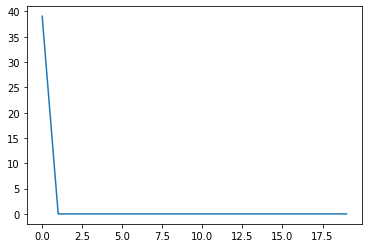

In [26]:
Wl1, Wl2, Wl3, B1, B2, B3, cost_list = model(train_set[:100], 10, 20, learning_rate=1)
cost_list = np.squeeze(cost_list)
plt.plot(cost_list)

In [22]:
# print(Wl1, Wl2, Wl3, B1, B2, B3)
correct_count = 0
for i in range(1000):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    print('prediction= ', predict)
    print('label= ', label)
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / 1000 * 100, '%')

prediction=  0
label=  5
prediction=  0
label=  0
prediction=  0
label=  4
prediction=  0
label=  1
prediction=  0
label=  9
prediction=  0
label=  2
prediction=  0
label=  1
prediction=  0
label=  3
prediction=  0
label=  1
prediction=  0
label=  4
prediction=  0
label=  3
prediction=  0
label=  5
prediction=  0
label=  3
prediction=  0
label=  6
prediction=  0
label=  1
prediction=  0
label=  7
prediction=  0
label=  2
prediction=  0
label=  8
prediction=  0
label=  6
prediction=  0
label=  9
prediction=  0
label=  4
prediction=  0
label=  0
prediction=  0
label=  9
prediction=  0
label=  1
prediction=  0
label=  1
prediction=  0
label=  2
prediction=  0
label=  4
prediction=  0
label=  3
prediction=  0
label=  2
prediction=  0
label=  7
prediction=  0
label=  3
prediction=  0
label=  8
prediction=  0
label=  6
prediction=  0
label=  9
prediction=  0
label=  0
prediction=  0
label=  5
prediction=  0
label=  6
prediction=  0
label=  0
prediction=  0
label=  7
prediction=  0
label=  6
